# Topic : Lecture 9 Linear regression (2330 stock)
<img src="https://www.tribloom.com/wp-content/uploads/2019/08/CRISP-DM_Process_Diagram-768x769.png" height=300>

Follow the CRSIP-DM method
1. Step 1: Import library, import data
2. Step 2: Pre-processing (missing data, categorical type, normalization, format transform, data augmentation)
3. Step 3: Build ML Model
4. Step 4: Evaluate Model
5. Step 5: Deploy (Prediction)


## Step 1: Load data (also import library)

In [4]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data
data=pd.read_csv("2330.csv")

# test=pd.read_csv("predict.csv")
print(data.tail())


          Date    x   x1   x2   x3   x4   x5
237  2022/4/15  562  573  573  557  558  573
238  2022/4/18  561  562  573  573  557  562
239  2022/4/19  565  561  562  573  573  561
240  2022/4/20  570  565  561  562  573  565
241  2022/4/21    0  570  565  561  562  570


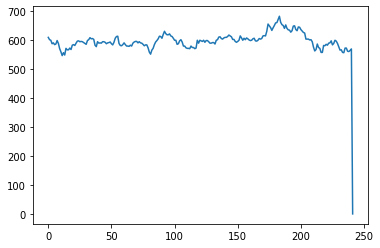

In [3]:
plt.plot(data.x)


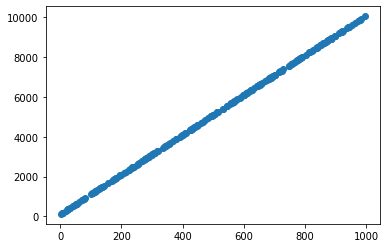

In [ ]:
# plt.scatter(data.x,data.y)

# Step 2: Pre-process X, Y
* format transform (轉換成numpy format)
* missing data (imputation)差補
* category data transform 
* data augmentation
* normalization


In [5]:
type(data)
data.columns

Index(['Date', 'x', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

In [9]:
data.columns
X=data.iloc[:-1,2:7].values.reshape(-1,5)
Y=data.iloc[:-1,1].values.reshape(-1,1)
testX=data.iloc[-1,2:7].values.reshape(-1,5)


print(type(X),X.shape)
# plt.scatter(X,Y)
print(type(Y),Y.shape)
print(type(testX),testX.shape)

<class 'numpy.ndarray'> (241, 5)
<class 'numpy.ndarray'> (241, 1)
<class 'numpy.ndarray'> (1, 5)


# Step 3: Build Model for training

In [10]:
from sklearn.linear_model import LinearRegression as LR
model=LR()  # constructor
model.fit(X,Y) # training

print(model) 
print("a*=",model.coef_[0],"b*=",model.intercept_ )


LinearRegression()
a*= [ 0.52344822 -0.16537456 -0.00053876  0.06366907  0.52344822] b*= [32.95420763]


In [13]:
print("stock price prediction y=",model.predict(testX))
# plt.scatter(X,Y)
# mx=np.array([0,1030])
# my=model.coef_[0]*mx+model.intercept_
# print(mx)
# print(my)
# plt.plot(mx,my,'r')

stock price prediction y= [[571.72832273]]


# Step 4: Evalute Model

In [ ]:
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
yPre=model.predict(X)
print("MSE=",MSE(Y,yPre))
print("R2=",R2(Y,yPre))

# # save model
# import pickle
# with open('model.pickle', 'wb') as f:
#     pickle.dump(model, f)

# # no need to perform model training in step 2
# with open('model.pickle', 'rb') as f:
#     model2 = pickle.load(f)
yPre=model.predict(testX)


MSE= 1.7621439667528923e-25
R2= 1.0


# Step 5: Deploy Model to predict new value

In [ ]:
test['y']=yPre
data.head()

,x,y
0,225,2350
1,626,6360
2,425,4350
3,354,3640
4,228,2380


In [ ]:
test.to_csv("result.csv", index=False, mode='w')